In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import the data
coffee_data = pd.read_csv("coffee_data.csv")
coffee_data.head()

,date,datetime,cash_type,card,money,coffee_name
0,3/1/24,2024-03-01 10:15:51,card,ANON-0000-0000-0001,38.7,Latte
1,3/1/24,2024-03-01 12:19:23,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,3/1/24,2024-03-01 12:20:18,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,3/1/24,2024-03-01 13:46:33,card,ANON-0000-0000-0003,28.9,Americano
4,3/1/24,2024-03-01 13:48:15,card,ANON-0000-0000-0004,38.7,Latte


## Cleaning the data

In [3]:
# Check for missing values
missing = coffee_data.isnull().sum()
missing

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [4]:
# Filling the missing values in card column
coffee_data['card'] = coffee_data.apply(lambda x: 'None' if x['cash_type'] == 'cash' else x['card'], axis = 1)

In [5]:
# Confirm the filled missing values
missing = coffee_data.isnull().sum()
missing

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [6]:
# Check for duplicates
duplicates = coffee_data.duplicated().sum()
duplicates

0

In [7]:
# Now the data does not contain have duplicates .

In [8]:
# Validate the data types
coffee_data.dtypes

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object

In [9]:
# Convert date column to date type
coffee_data['date'] = pd.to_datetime(coffee_data['date'])

C:\Users\User\AppData\Local\Temp\ipykernel_13140\3121190052.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  coffee_data['date'] = pd.to_datetime(coffee_data['date'])


In [10]:
# Convert datetime column to datetime type
coffee_data['datetime'] = pd.to_datetime(coffee_data['datetime'], format='%Y-%m-%d %H:%M:%S')

In [11]:
# Add new columns month, day and hour
coffee_data['month'] = coffee_data['date'].dt.month_name()
coffee_data['day'] = coffee_data['date'].dt.day_name()
coffee_data['hour'] = coffee_data['datetime'].dt.hour

In [12]:
# Ensure datatypes are correct
coffee_data.dtypes

date           datetime64[ns]
datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
month                  object
day                    object
hour                    int32
dtype: object

## Analysis

### 1:Which type of coffee is the most consumed

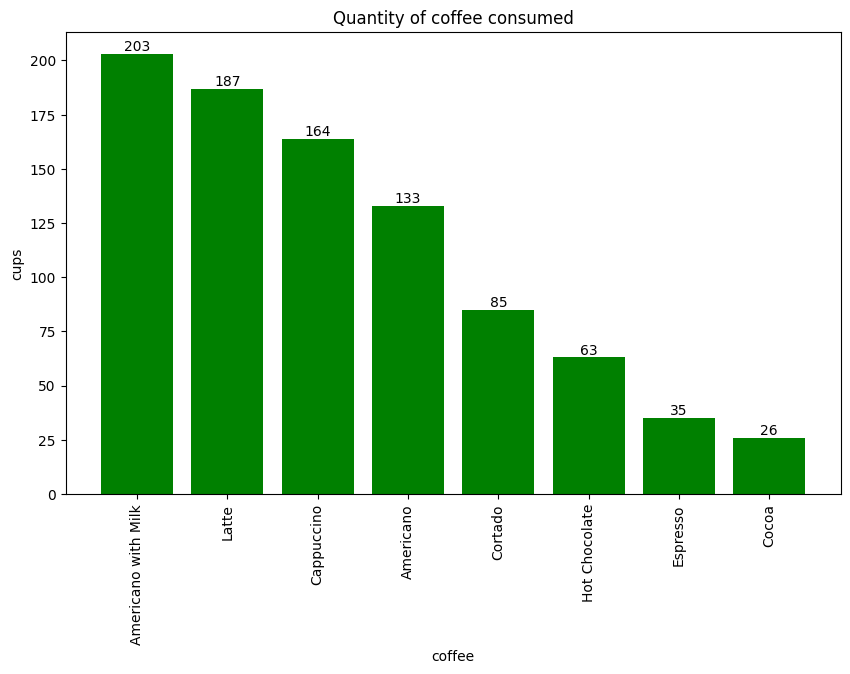

In [70]:
coffee_category = coffee_data.groupby('coffee_name').count()['cash_type'].sort_values(ascending = False)
coffee = coffee_category.index
cups = coffee_category .values
plt.figure(figsize = (10,6))
bars = plt.bar(coffee,cups, color = 'green')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')
plt.title('Quantity of coffee consumed')
plt.xlabel('coffee')
plt.ylabel('cups')
plt.xticks(rotation=90)
plt.show()

### 2:Which type of coffee is the most sold

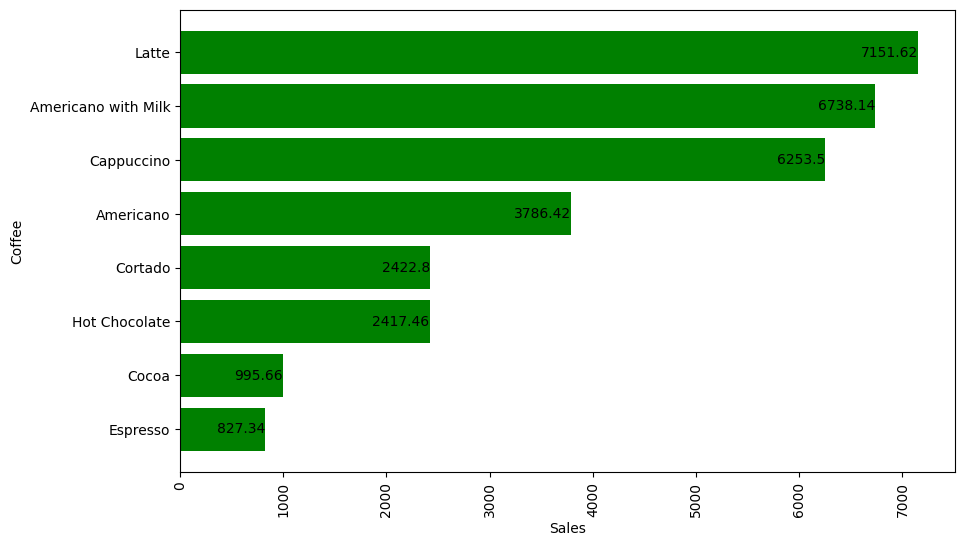

In [71]:
coffee_category = coffee_data.groupby('coffee_name').sum(numeric_only = True)['money'].sort_values(ascending = True)
coffee = coffee_category.index
sales = coffee_category .values
plt.figure(figsize = (10,6))
bars = plt.barh(coffee,sales, color = 'green')
plt.xticks(rotation=90)
plt.xlabel('Sales')
plt.ylabel('Coffee')
for bar in bars:
    xval = bar.get_width()
    yval = bar.get_y() + bar.get_height() / 2
    plt.text(xval + 0.01, yval, round(xval, 2), ha='right', va='center')
plt.show()

### 3:Is the most consumed coffee the cheapest?

In [16]:
coffee_category = coffee_data.groupby('coffee_name').mean(numeric_only = True)['money'].sort_values(ascending = False)
coffee_category

coffee_name
Hot Chocolate          38.372381
Cocoa                  38.294615
Latte                  38.243957
Cappuccino             38.131098
Americano with Milk    33.192808
Cortado                28.503529
Americano              28.469323
Espresso               23.638286
Name: money, dtype: float64

In [32]:
# Thes most consumed type of coffee is 'americano with milk' which is not the cheapest, this means there are other factors that affecct coffee 
# consumption other than price.

### 4:Which payment method is most common, and which generates the most revenue?

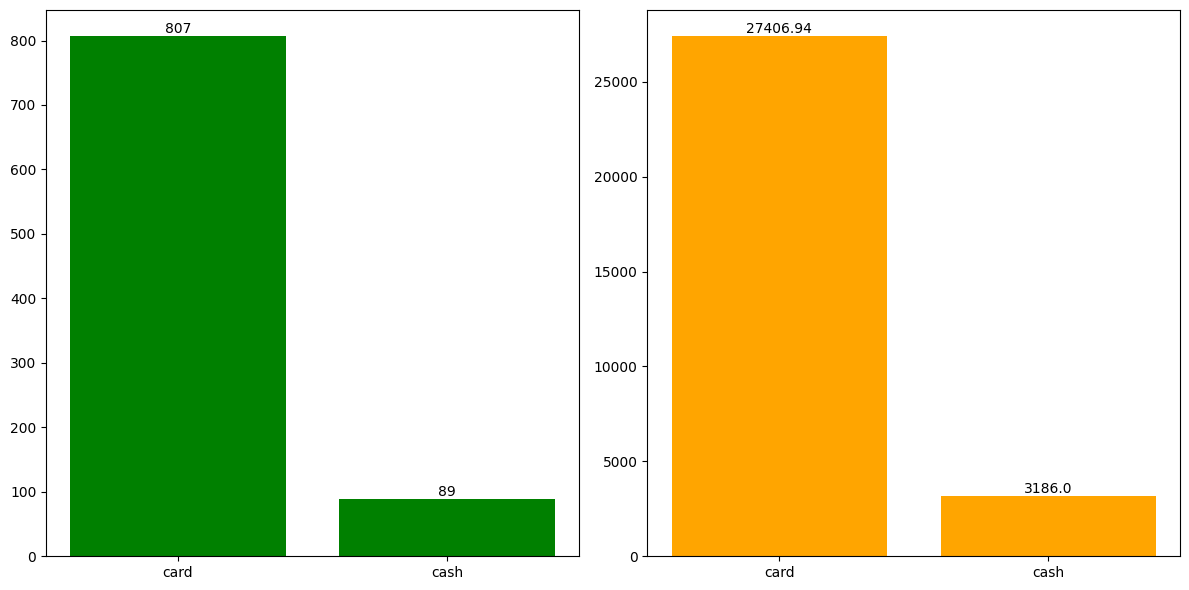

In [69]:
# first graph
payment_category = coffee_data.groupby('cash_type').count()['date']
cash_type = payment_category.index
count = payment_category.values

# second graph
payment_category = coffee_data.groupby('cash_type').sum(numeric_only = True)['money']
cash_type = payment_category.index
cash_type_revenue = payment_category.values

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# first subplot
bars1 = ax1.bar(cash_type,count,color = 'green')
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Second suplot
bars2 = ax2.bar(cash_type,cash_type_revenue, color = 'orange')
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# plotting
plt.tight_layout()
plt.show()

In [65]:
# Clearly we can see that card payment method is the most common and generates more revenue

### 5: At what time of the day is coffee consumed most?

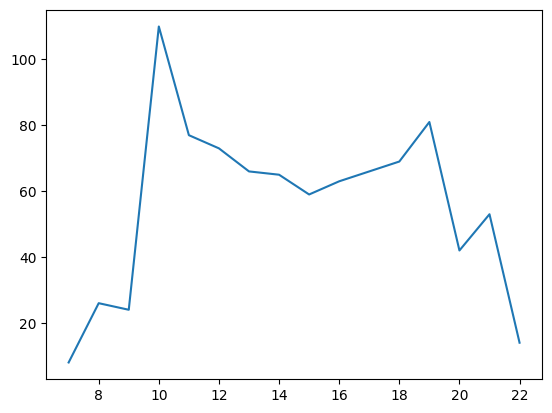

In [79]:
coffee_time = coffee_data.groupby('hour').count()['date']
hour = coffee_time.index
hour_count = coffee_time.values

plt.plot(hour,hour_count)
plt.show()

In [81]:
# People consume more coffee between 9 to 10

### 6:Which day of the week has the highest coffee sales?

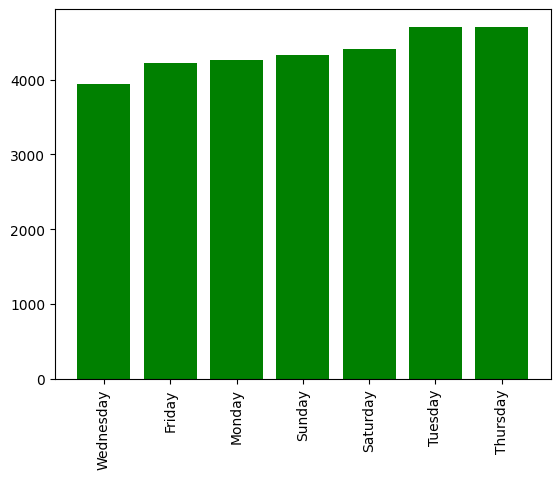

In [89]:
coffee_time = coffee_data.groupby('day').sum(numeric_only = True)['money'].sort_values(ascending = True)
hour = coffee_time.index
hour_count = coffee_time.values

plt.bar(hour,hour_count,color = 'green')
plt.xticks(rotation = 90)
plt.show()

In [88]:
# Thursday